In [7]:
import numpy as np

h = 6.63e-34 # J/s
c = 3e8 #m/s
Lambda = 100*1e-9 #m

# energy of irradiation (J)
me = 9.1e-31 # electron mass, kg
v = 0.001*c # 1% of c, m/s

# KE = h.f - IE
IE = h*c/Lambda - 0.5*me*v**2
print(f"Ionisation Energy, in eV = {IE/1.6e-19}")

Ionisation Energy, in eV = 12.175312499999997


In [8]:
e = 1.6e-19
epsilon = 8.85e-12
r = 2.7e-10

print(-e**2/(4*np.pi*epsilon*r)/e)

-5.328476855974734


C:\Users\soumy\AppData\Local\Temp\ipykernel_6880\2782480712.py:35: DeprecationWarning: You are passing x=[0.] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integral_simpson = integrate.simpson(f(x), x)
C:\Users\soumy\AppData\Local\Temp\ipykernel_6880\2782480712.py:35: DeprecationWarning: You are passing x=[ 0.          1.74532925  3.4906585   5.23598776  6.98131701  8.72664626
 10.47197551 12.21730476 13.96263402 15.70796327] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integral_simpson = integrate.simpson(f(x), x)
C:\Users\soumy\AppData\Local\Temp\ipykernel_6880\2782480712.py:35: DeprecationWarning: You are passing x=[ 0.          0.1586663   0.31733259  0.47599889  0.63466518  0.79333148
  0.95199777  1.11066407  1.26933037  1.42799666  1.58666296  1.

Integration Results:
       N  Single-Sided Sum  Trapezoidal Rule  Simpson's Rule
0      1          0.000000          0.000000        0.000000
1     10          2.240649          1.455250        1.640289
2    100          1.696033          1.617493        1.633967
3   1000          1.640184          1.632330        1.633965
4  10000          1.634587          1.633801        1.633965

Errors:
       N  Single-Sided Sum  Trapezoidal Rule  Simpson's Rule
0      1          1.633965          1.633965    1.633965e+00
1     10          0.606684          0.178714    6.323878e-03
2    100          0.062068          0.016472    1.906031e-06
3   1000          0.006219          0.001635    1.799041e-10
4  10000          0.000622          0.000163    1.754152e-14


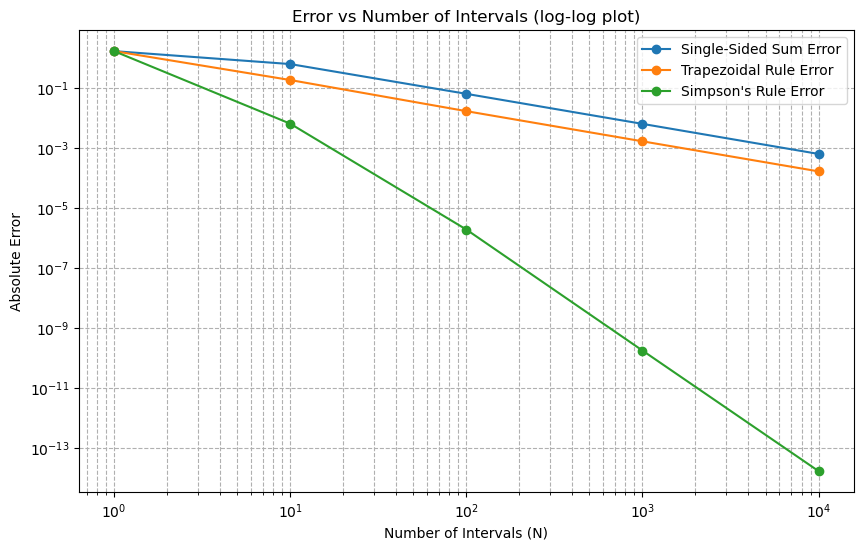

In [9]:
import numpy as np
from scipy import integrate
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to be integrated
def f(x):
    return np.sinc(x / np.pi)  # sinc(x) = sin(x) / x, numpy uses normalized version

# Integration limits
a, b = 0, 5 * np.pi

# Calculate integrals for different values of N
k_values = range(5)
n_values = [10**k for k in k_values]

results = []
errors = []
direct_value, _ = integrate.quad(f, a, b)

for n in n_values:
    # Single-sided sum method
    x = np.linspace(a, b, n)
    dx = (b - a) / n
    integral_sum = 0
    for i in range(n - 1):
        integral_sum += f(x[i]) * dx

    # Trapezoidal rule
    integral_trap = 0
    for i in range(n - 1):
        integral_trap += (f(x[i]) + f(x[i + 1])) * 0.5 * dx

    # Simpson's rule using scipy
    integral_simpson = integrate.simpson(f(x), x)

    # Store results
    results.append([n, integral_sum, integral_trap, integral_simpson])
    errors.append([
        n,
        abs(integral_sum - direct_value),
        abs(integral_trap - direct_value),
        abs(integral_simpson - direct_value)
    ])

# Create DataFrames to display results
columns = ["N", "Single-Sided Sum", "Trapezoidal Rule", "Simpson's Rule"]
results_df = pd.DataFrame(results, columns=columns)
errors_df = pd.DataFrame(errors, columns=columns)

# Display results in tabular format
print("Integration Results:")
print(results_df)
print("\nErrors:")
print(errors_df)

# Plot absolute value of the error as a function of N in a log-log plot
plt.figure(figsize=(10, 6))
plt.loglog(errors_df["N"], errors_df["Single-Sided Sum"], label="Single-Sided Sum Error", marker='o')
plt.loglog(errors_df["N"], errors_df["Trapezoidal Rule"], label="Trapezoidal Rule Error", marker='o')
plt.loglog(errors_df["N"], errors_df["Simpson's Rule"], label="Simpson's Rule Error", marker='o')
plt.xlabel("Number of Intervals (N)")
plt.ylabel("Absolute Error")
plt.title("Error vs Number of Intervals (log-log plot)")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()
